In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
conversion = pd.read_csv('conversion.csv')

In [6]:
conversion['xyz_campaign_id'].nunique()

3

In [9]:
conversion_fb = conversion['fb_campaign_id']

In [19]:
conversion

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2


In [27]:
coversion_fb_log = np.log(conversion.groupby('fb_campaign_id')['Impressions'].sum())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Impressions'>

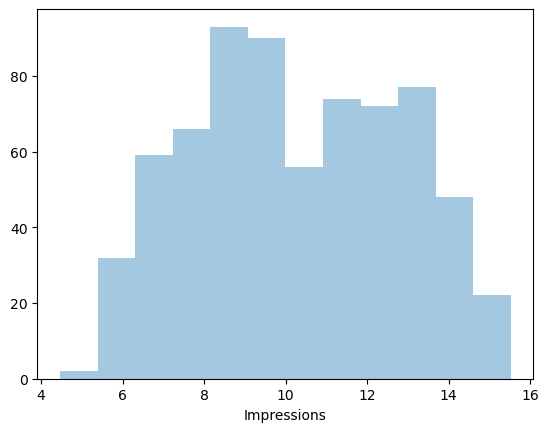

In [29]:
sns.distplot(coversion_fb_log, kde=False)

In [31]:
conversion['CTR'] = conversion['Clicks'] / conversion['Impressions']

In [81]:
conversion.sort_values('CTR', ascending=False)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059,1.42
440,950224,936,123464,40-44,M,20,2367,2,2.84,1,1,0.000845,1.42
505,951779,936,123723,45-49,F,27,3277,2,2.68,1,0,0.000610,1.34
476,951202,936,123627,45-49,F,26,5307,3,4.29,2,1,0.000565,1.43
448,950537,936,123516,40-44,M,36,1884,1,1.41,1,0,0.000531,1.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,777166,936,115625,30-34,M,63,2383,0,0.00,1,1,0.000000,NaN
269,777131,936,115619,35-39,M,16,6359,0,0.00,1,0,0.000000,NaN
268,777130,936,115619,35-39,M,16,6260,0,0.00,1,0,0.000000,NaN
266,776935,936,115587,45-49,M,36,1136,0,0.00,1,1,0.000000,NaN


In [39]:
coversion_CTR = conversion.groupby('xyz_campaign_id',as_index=False)

In [53]:
CTR_916 = conversion[conversion['xyz_campaign_id'] == 916]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CTR'>

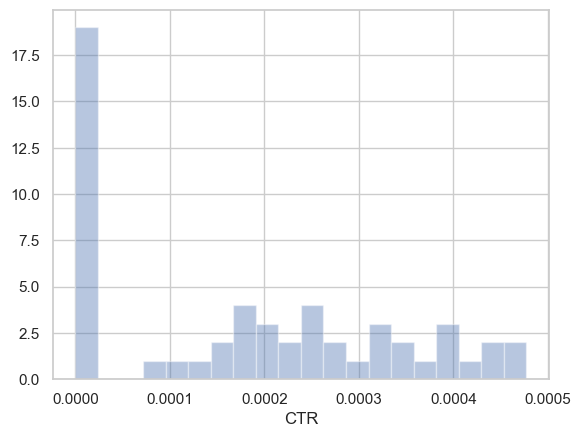

In [56]:
sns.set(style="whitegrid")
sns.distplot(CTR_916['CTR'], bins=20, kde=False)

In [58]:
conversion['CPC'] = conversion['Spent'] / conversion['Clicks']

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64


TypeError: 'NoneType' object is not iterable

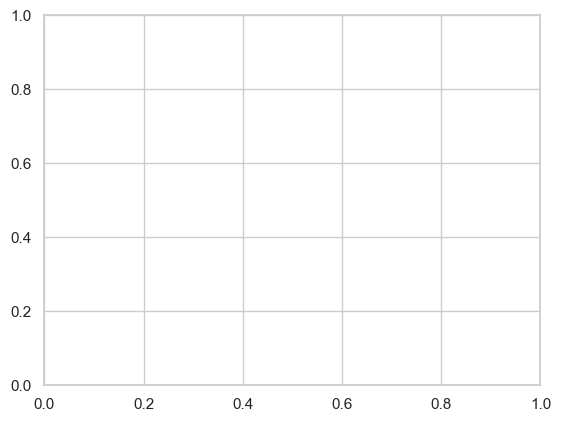

In [93]:
print(conversion['CPC'].describe())

sns.histplot(conversion.groupby('gender')['CPC'])

In [60]:
round(1.644364 - 1.390000, 2)

0.25

In [82]:
conversion_gender = conversion.groupby('gender')['Impressions']
conversion_gender.head()

0      7350
1     17861
2       693
3      4259
4      4133
35     2654
36    57665
37     3091
38     5014
39    38726
Name: Impressions, dtype: int64

In [89]:
conversion.groupby('gender').head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.000136,1.430000
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.000112,0.910000
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.000000,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.000235,1.250000
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.000242,1.290000
35,710477,916,104205,30-34,F,16,2654,0,0.00,1,1,0.000000,NaN
36,710480,916,104205,30-34,F,16,57665,14,18.07,1,1,0.000243,1.290714
37,710571,916,104220,30-34,F,32,3091,1,1.61,1,1,0.000324,1.610000
38,710617,916,104228,30-34,F,15,5014,1,1.19,1,0,0.000199,1.190000
39,710623,916,104229,30-34,F,16,38726,7,9.22,1,0,0.000181,1.317143


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CPC', ylabel='Density'>

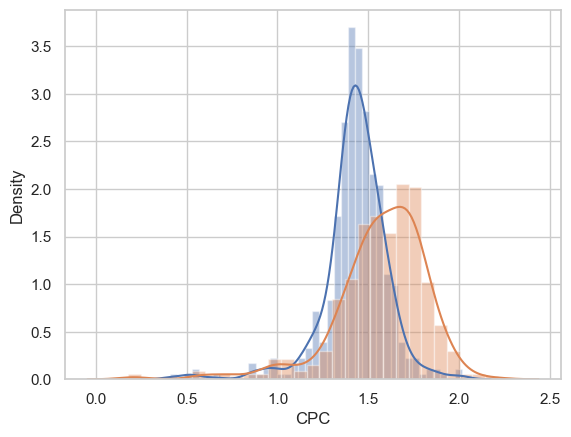

In [97]:
sns.distplot(conversion.query("gender == 'F'")['CPC'].dropna())
sns.distplot(conversion.query("gender == 'M'")['CPC'].dropna())

In [98]:
conversion_rate = conversion.query('ad_id == 1121814 ')['Approved_Conversion'] / conversion.query('ad_id == 1121814 ')['Clicks']

In [99]:
round(conversion_rate*100, 2)

860    3.09
dtype: float64